In [1]:
from pylab import *

# Método iterativo de Jacobi

En 2-D (en 3-D es similar)
$$
\phi_{i,j} = \frac{1}{4}(\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1})
$$

In [84]:
def malla_de_potencial(x,y,xc,yc,V0=1):
    # x,y son las coordenadas donde quiero encontrar la solucion
    # xc,yc son las coordenadas donde el potencial es constante
    Nx, Ny = len(x),len(y)
    Mat = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            if xc[0] <= x[i] <= xc[1] and yc[0] <= y[j] <= yc[1]:
                Mat[i,j] = V0
    return Mat

def relax(Mat,V0=1):
    Nx , Ny = Mat.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if Mat[i,j] != V0:
                Mat[i,j] = 0.25*( Mat[i+1,j] + Mat[i-1,j] + 
                                 Mat[i,j+1] + Mat[i,j-1])
    return Mat

In [85]:
x , y = linspace(0,1,100) , linspace(0,1,100)
xc , yc = [0.25,0.75] , [0.25,0.75]
Mat_V = malla_de_potencial(x,y,xc,yc)
for i in range(1500):
    Mat_V = relax(Mat_V)

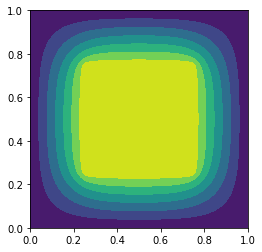

In [86]:
X,Y = meshgrid(x,y)
contourf(X,Y,Mat_V)
gca().set_aspect('equal')
show()

In [87]:
Ex,Ey = gradient(-Mat_V)

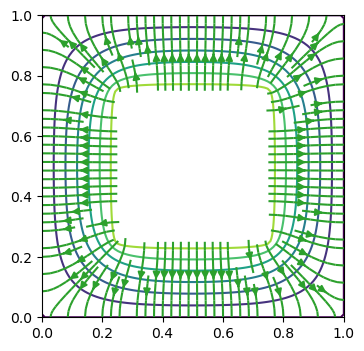

In [88]:
figure(dpi=100)
contour(X,Y,Mat_V)
streamplot(X,Y,Ey,Ex,density=1.2,color='tab:green')
gca().set_aspect('equal')
show()

In [125]:
def malla_de_mastercard(x,y,xc,yc,r,V0=1):
    # x,y son las coordenadas donde quiero encontrar la solucion
    # xc,yc son las coordenadas donde el potencial es constante
    Nx, Ny = len(x),len(y)
    Mat = zeros( (Nx,Ny) )
    for i in range(Nx):
        for j in range(Ny):
            circ1 = sqrt( (x[i]-xc[0])**2 + (y[j]-yc[0])**2 )
            circ2 = sqrt( (x[i]-xc[1])**2 + (y[j]-yc[1])**2 )
            if circ1 < r or circ2 < r:
                Mat[j,i] = V0
    return Mat

In [130]:
x , y = linspace(0,1,100) , linspace(0,1,100)
xc , yc , r = [0.4,0.6] , [0.5,0.5] , 0.1
Mat_V = malla_de_mastercard(x,y,xc,yc,r)
for i in range(1500):
    Mat_V = relax(Mat_V)

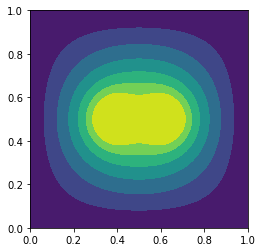

In [131]:
X,Y = meshgrid(x,y)
contourf(X,Y,Mat_V)
gca().set_aspect('equal')
show()